**Import necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

**Load the dataset**

In [ ]:
# Assuming the dataset is in a CSV file named 'PlayTennis.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Tennis.csv', index_col=0)

**Dataset Visualization**

In [ ]:
df.head()

,Outlook,Temprature,Humidity,Wind,Play_Tennis
Day,,,,,
D1,Sunny,Hot,High,Weak,No
D2,Sunny,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Yes
D4,Rain,Mild,High,Weak,Yes
D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
df.shape

(14, 5)

**EDA**

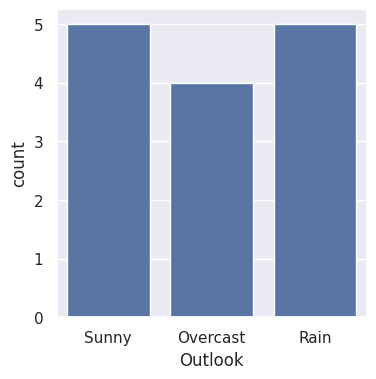

In [ ]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Outlook'])
plt.show()

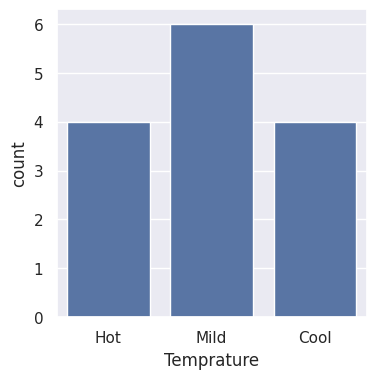

In [ ]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Temprature'])
plt.show()

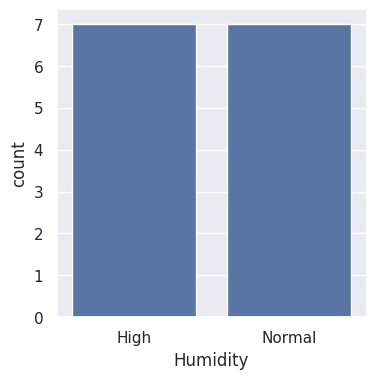

In [ ]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Humidity'])
plt.show()

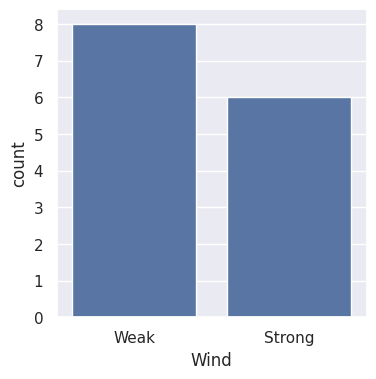

In [ ]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Wind'])
plt.show()

**Feature Extraction**

In [ ]:
# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column 'PlayTennis'

**Use OneHotEncoder for categorical variables in features**

In [ ]:
categorical_features = ['Outlook', 'Temprature', 'Humidity', 'Wind']

preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)

**Use LabelEncoder for the target variable**

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

**Split the dataset into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

**Create a Random Forest classifier**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=50)

**Fit the model to the training data**

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

**Make predictions on the test set**

In [ ]:
y_pred = rf_classifier.predict(X_test)

**Evaluate the performance of the classifier**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

**Print the results**

RF Accuracy: 0.6666666666666666
RF Confusion Matrix:
[[1 0]
 [1 1]]
RF Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



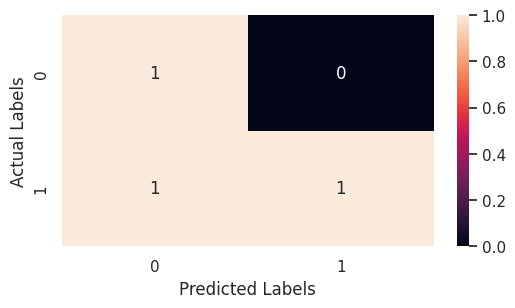

In [ ]:
print(f'RF Accuracy: {accuracy}')
print(f'RF Confusion Matrix:\n{conf_matrix}')
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print(f'RF Classification Report:\n{classification_report_str}')

**Predict whether a person will play tennis or not**

In [ ]:
# Assuming we have a new set of feature values for prediction
new_data = pd.DataFrame({'Outlook': ['Sunny'], 'Temprature': ['Hot'], 'Humidity': ['High'], 'Wind': ['Weak']})

# Encode categorical variables using the same OneHotEncoder
new_data_encoded = preprocessor.transform(new_data)

# Use the trained DT model to make predictions
predicted_play_tennis = rf_classifier.predict(new_data_encoded)

# Print the predicted outcome
if predicted_play_tennis[0] == 1:
    print("The person is predicted to play tennis.")
else:
    print("The person is predicted not to play tennis.")

The person is predicted not to play tennis.
